**Created by Sanskar Hasija**

**[TPS-DEC] 📊EDA + Modeling🔥**

**1 DECEMBER 2021**


# <center> [TPS-DEC] 📊EDA + MODELING🔥</center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
    - [3.3 Submission File](#3.3)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.1 Continuos and Categorical Data Distribution](#4.1)
    - [4.2 Feature Distribution of Continous Features](#4.2)
    - [4.3 Feature Distribution of Categorical Features](#4.3)
    - [4.4 Target Distribution ](#4.4)
- [5. Feature Engineering](#5)
- [6. Modeling](#6)
    - [6.1 LGBM Classifier](#6.1)
    - [6.2 Catboost Classifier](#6.2)
    - [6.3 XGBoost Classifier](#6.3)
    - [6.4 Neural Network](#6.4)
- [7. Submission](#7)

<a id="1"></a>
# Introduction

**The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. This dataset is based off of the original Forest Cover Type Prediction competition.**

**Submissions are evaluated on multi-class classification accuracy.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical

from matplotlib import ticker
import time
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# Data Loading and Preperation

In [2]:
train = pd.read_csv("../input/tabular-playground-series-dec-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-dec-2021/test.csv")
submission = pd.read_csv("../input/tabular-playground-series-dec-2021/sample_submission.csv")


train.drop(["Id"] , axis = 1 , inplace = True)
test.drop(["Id"] , axis = 1 , inplace = True)
TARGET = 'Cover_Type'
FEATURES = [col for col in train.columns if col not in ['id', TARGET]]
RANDOM_STATE = 12 

<a id="3.1"></a>
## Exploring Train Data

### Quick view of Train Data

In [3]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3189,40,8,30,13,3270,206,234,193,4873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,3026,182,5,280,29,3270,233,240,106,5423,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,3106,13,7,351,37,2914,208,234,137,5269,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3022,276,13,192,16,3034,207,238,156,2866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,2906,186,13,266,22,2916,231,231,154,2642,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2


In [4]:
print(f'Number of rows in train data: {train.shape[0]}')
print(f'Number of columns in train data: {train.shape[1]}')
print(f'No of missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 4000000
Number of columns in train data: 55
No of missing values in train data: 0


### Basic statistics of training data

In [5]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000,4000000.000000
mean,2980.191660,151.585671,15.097537,271.315436,51.662621,1766.641630,211.837542,221.061441,140.810874,1581.406810,0.261193,0.041661,0.653573,0.021819,0.016841,0.030896,0.004275,0.037913,0.015715,0.007973,0.000000,0.002900,0.010893,0.054541,0.027985,0.018290,0.031295,0.014977,0.000000,0.015888,0.020672,0.013436,0.013811,0.017368,0.011539,0.031346,0.049171,0.025022,0.003258,0.013527,0.011766,0.010708,0.022274,0.028867,0.027493,0.037462,0.037821,0.011995,0.016053,0.010713,0.012207,0.040752,0.039239,0.031619,1.771335
std,289.048167,109.961122,8.546731,226.549680,68.215966,1315.609890,30.759956,22.231335,43.698639,1127.616169,0.439285,0.199813,0.475831,0.146092,0.128677,0.173036,0.065247,0.190985,0.124372,0.088934,0.000000,0.053771,0.103800,0.227082,0.164931,0.133998,0.174115,0.121459,0.000000,0.125044,0.142283,0.115133,0.116707,0.130638,0.106798,0.174251,0.216224,0.156191,0.056988,0.115516,0.107830,0.102923,0.147572,0.167433,0.163516,0.189891,0.190763,0.108863,0.125681,0.102947,0.109811,0.197714,0.194164,0.174982,0.893806
min,1773.000000,-33.000000,-3.000000,-92.000000,-317.000000,-287.000000,-4.000000,49.000000,-53.000000,-277.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2760.000000,60.000000,9.000000,110.000000,4.000000,822.000000,198.000000,210.000000,115.000000,781.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2966.000000,123.000000,14.000000,213.000000,31.000000,1436.000000,218.000000,224.000000,142.000000,1361.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

<a id="3.2"></a>
## Exploring Test Data

### Quick view of Test Data

In [6]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2763,78,20,377,88,3104,218,213,195,1931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2826,153,11,264,39,295,219,238,148,2557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2948,57,19,56,44,852,202,217,163,1803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2926,119,6,158,134,2136,234,240,142,857,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2690,10,4,38,108,3589,213,221,229,431,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print(f'Number of rows in test data: {test.shape[0]}')
print(f'Number of columns in test data: {test.shape[1]}')
print(f'No of missing values in test data: {sum(test.isna().sum())}')

Number of rows in test data: 1000000
Number of columns in test data: 54
No of missing values in test data: 0


### Basic statistics of test data

In [8]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2969.602410,152.231636,14.923460,264.368149,51.480362,1713.507869,211.659709,221.476154,139.861454,1665.384311,0.229048,0.053235,0.472548,0.056532,0.022789,0.030193,0.029022,0.044391,0.016714,0.032741,0.000000,0.003008,0.011266,0.064938,0.028849,0.021435,0.032582,0.015967,0.000000,0.015995,0.033441,0.014040,0.013838,0.017473,0.011772,0.032867,0.045478,0.026570,0.003349,0.013482,0.011794,0.011003,0.012314,0.046746,0.029638,0.043415,0.040606,0.012155,0.015766,0.010695,0.012063,0.043393,0.039841,0.032778
std,342.676046,111.629725,8.457005,227.971753,68.520188,1374.922218,31.280435,21.951950,45.398002,1212.225118,0.420220,0.224502,0.499246,0.230946,0.149230,0.171118,0.167868,0.205962,0.128198,0.177958,0.000000,0.054763,0.105542,0.246417,0.167382,0.144829,0.177540,0.125348,0.000000,0.125456,0.179785,0.117656,0.116818,0.131026,0.107858,0.178289,0.208350,0.160823,0.057774,0.115327,0.107958,0.104317,0.110283,0.211094,0.169587,0.203790,0.197376,0.109578,0.124569,0.102862,0.109167,0.203740,0.195586,0.178055
min,1782.000000,-33.000000,-3.000000,-136.000000,-329.000000,-264.000000,1.000000,53.000000,-51.000000,-267.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2725.000000,59.000000,9.000000,102.000000,3.000000,751.000000,197.000000,210.000000,114.000000,820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2968.000000,124.000000,14.000000,206.000000,31.000000,1320.000000,218.000000,224.000000,142.000000,1416.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

<a id="3.3"></a>
## Submission File

In [9]:
submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# EDA

<a id="4.1"></a>
## Overview of Data

In [10]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Horizontal_Distance_To_Roadways,4000000.000000,1766.641630,1315.609890,-287.000000,822.000000,1436.000000,2365.000000,7666.000000
Horizontal_Distance_To_Fire_Points,4000000.000000,1581.406810,1127.616169,-277.000000,781.000000,1361.000000,2084.000000,8075.000000
Elevation,4000000.000000,2980.191660,289.048167,1773.000000,2760.000000,2966.000000,3217.000000,4383.000000
Horizontal_Distance_To_Hydrology,4000000.000000,271.315436,226.549680,-92.000000,110.000000,213.000000,361.000000,1602.000000
Aspect,4000000.000000,151.585671,109.961122,-33.000000,60.000000,123.000000,247.000000,407.000000
Vertical_Distance_To_Hydrology,4000000.000000,51.662621,68.215966,-317.000000,4.000000,31.000000,78.000000,647.000000
Hillshade_3pm,4000000.000000,140.810874,43.698639,-53.000000,115.000000,142.000000,169.000000,272.000000
Hillshade_9am,4000000.000000,211.837542,30.759956,-4.000000,198.000000,218.000000,233.000000,301.000000
Hillshade_Noon,4000000.000000,221.061441,22.231335,49.000000,210.000000,224.000000,237.000000,279.000000
Slope,4000000.000000,15.097537,8.546731,-3.000000,9.000000,14.000000,20.000000,64.000000


<a id="4.2"></a>
## Continuos and Categorical Data Distribution

Total number of features: 54
Number of categorical features: 44
Number of continuos features: 10


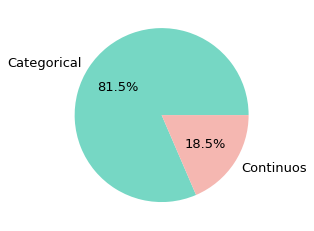

In [11]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

del df
print(f'Total number of features: {len(FEATURES)}')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuos features: {len(cont_features)}')

plt.pie([len(cat_features), len(cont_features)], 
        labels=['Categorical', 'Continuos'],
        colors=['#76D7C4', '#F5B7B1'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()

<a id="4.3"></a>
## Feature Distribution of Continous Features

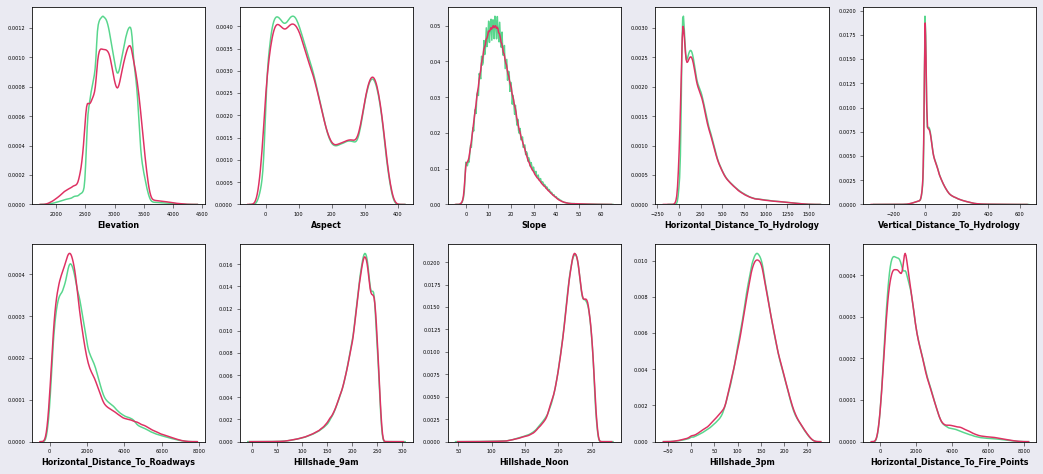

In [12]:
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 8), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#58D68D', label='Train data')
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#DE3163', label='Test data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

<a id="4.4"></a>
## Feature Distribution of Categorical Features

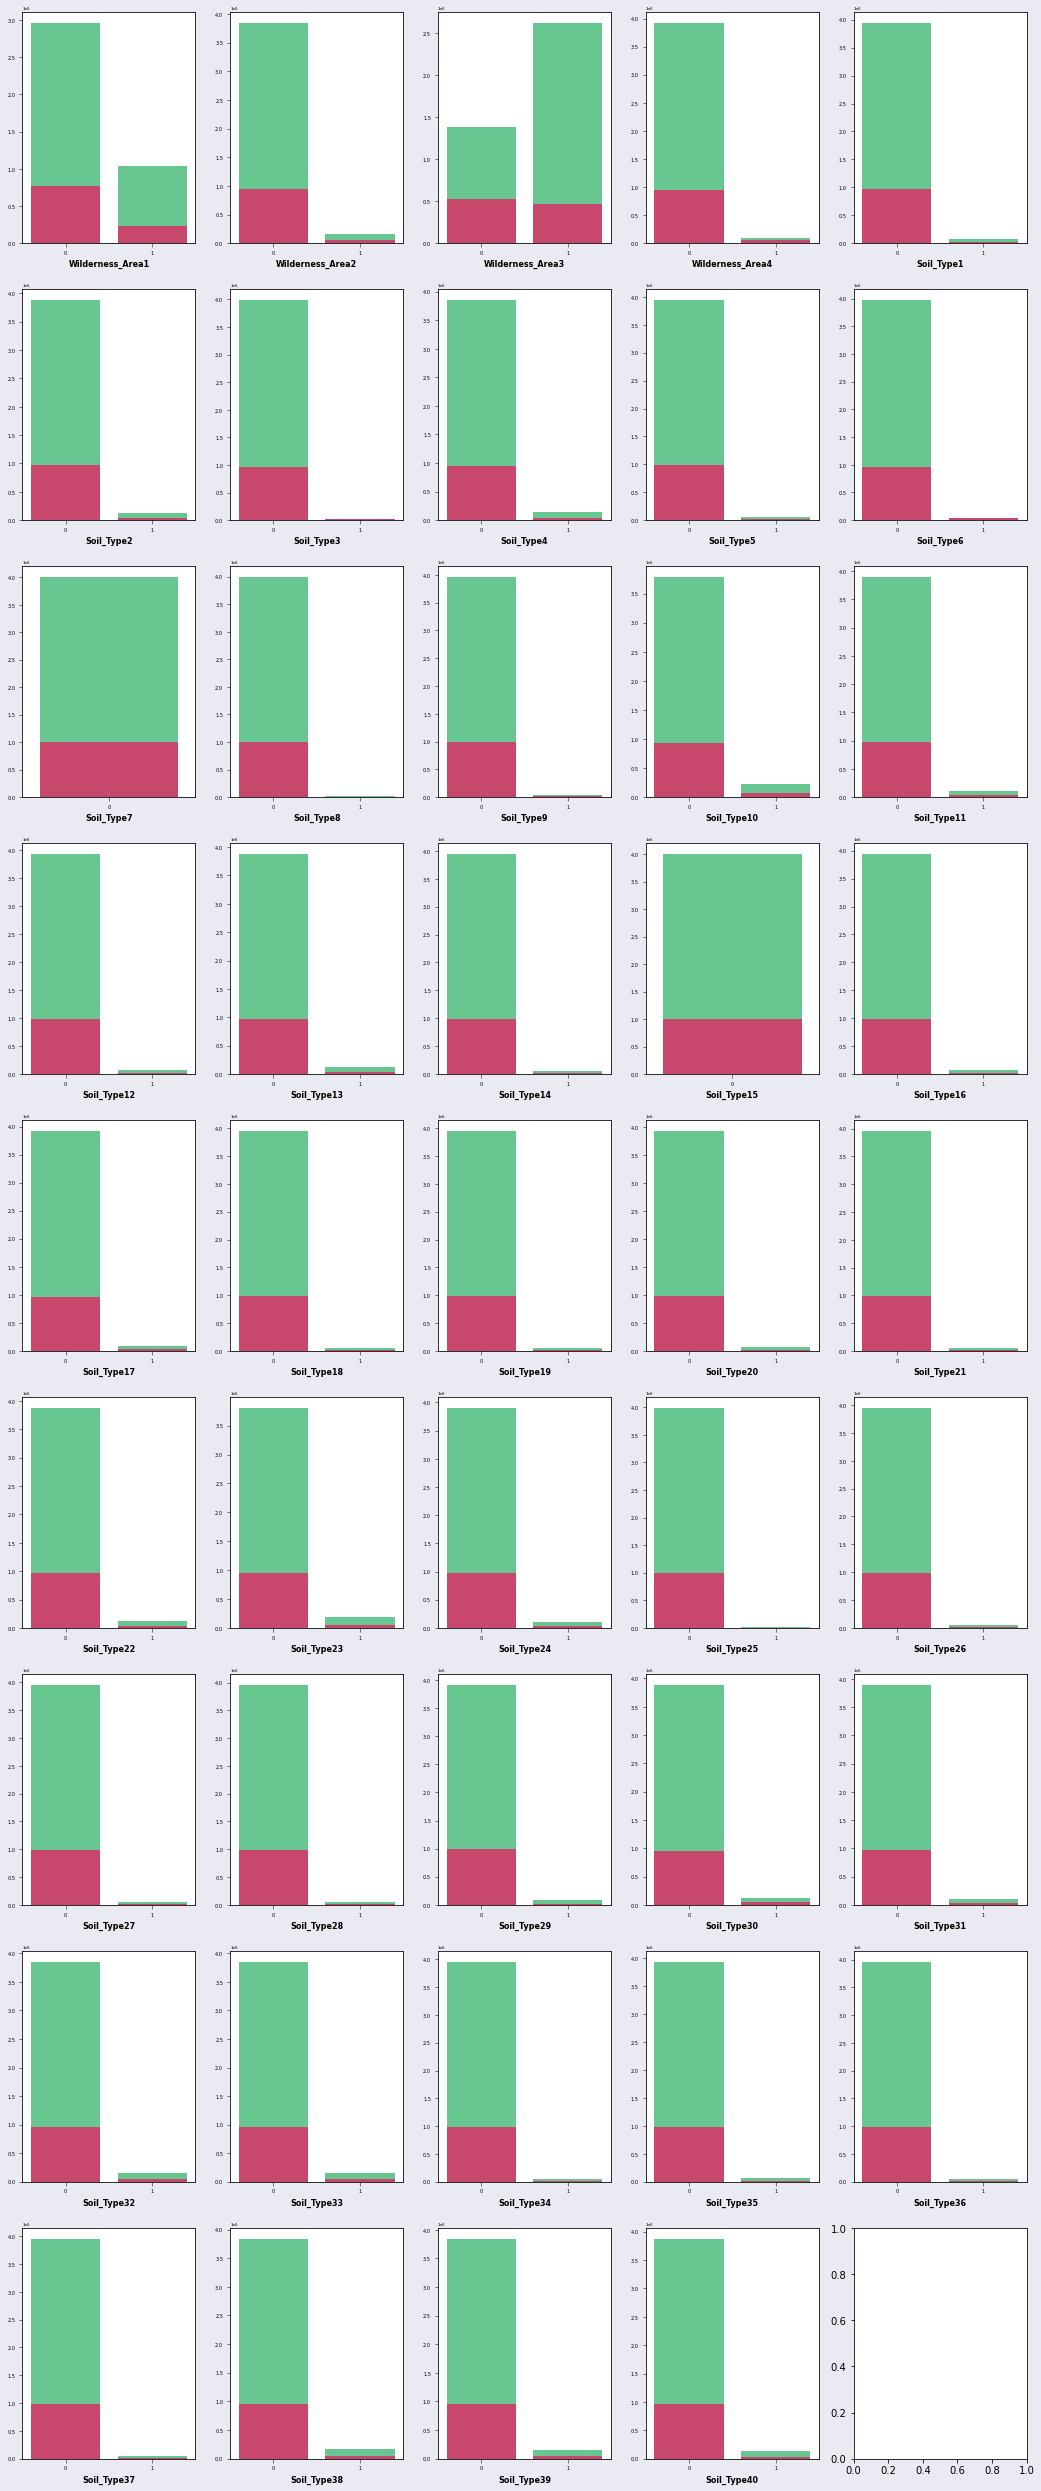

In [13]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 5
    nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0)) 

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 45), facecolor='#EAEAF2')

    for r in range(nrows):
        for c in range(ncols):
            if r*ncols+c >= len(cat_features):
                break
            col = cat_features[r*ncols+c]
            sns.countplot(x=train[col], ax=axes[r, c], color='#58D68D', label='Train data')
            sns.countplot(x=test[col], ax=axes[r, c], color='#DE3163', label='Test data')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(4)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
    plt.show()

**```Soil_type7``` and ```Soil_Type15``` are all zero values**

<a id="4.5"></a>
## Target Distribution

In [14]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = 'Cover_Type',
             y = 'count' , 
             color = "count",
             color_continuous_scale="Emrld") 
fig.show()
target_df.sort_values(by =TARGET , ignore_index = True)

,Cover_Type,count
0,1,1468136
1,2,2262087
2,3,195712
3,4,377
4,5,1
5,6,11426
6,7,62261


**There are total 7 different output classes**

### Removing Unwanted Rows and columns

In [15]:
train = train.drop(index = int(np.where(train["Cover_Type"] == 5 )[0]))
train = train.drop(labels = ["Soil_Type7" , "Soil_Type15"] ,axis = 1)
FEATURES.remove('Soil_Type7')
FEATURES.remove('Soil_Type15')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
#  Feature Engineering

In [16]:
train["mean"] = train[FEATURES].mean(axis=1)
train["std"] = train[FEATURES].std(axis=1)
train["min"] = train[FEATURES].min(axis=1)
train["max"] = train[FEATURES].max(axis=1)

test["mean"] = test[FEATURES].mean(axis=1)
test["std"] = test[FEATURES].std(axis=1)
test["min"] = test[FEATURES].min(axis=1)
test["max"] = test[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
#  Modeling

In [17]:
scaler = StandardScaler()
for col in FEATURES:
    train[col] = scaler.fit_transform(train[col].to_numpy().reshape(-1,1))
    test[col] = scaler.transform(test[col].to_numpy().reshape(-1,1))
    
X = train[FEATURES].to_numpy().astype(np.float32)
y = train[TARGET].to_numpy().astype(np.float32)
X_test = test[FEATURES].to_numpy().astype(np.float32)

del train, test

<a id="6.1"></a>
## LGBM Classifier

In [18]:
lgb_params = {
    'objective' : 'multiclass',
    'metric' : 'multi_logloss',
    'device' : 'gpu',
}


lgb_predictions = []
lgb_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X = X, y = y)):

    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    x_train = X[train_idx, :]
    x_valid = X[valid_idx, :]
    y_train = y[train_idx]
    y_valid = y[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(x_train, y_train,
          early_stopping_rounds=200,
          eval_set=[(x_valid, y_valid)],
          verbose=0)
    
    preds_valid = model.predict(x_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    print(f"Fold={fold+1}, acc: {acc:.8f}, Run Time: {run_time:.2f}")
    test_preds = model.predict(X_test)
    lgb_predictions.append(test_preds)
    
print("Mean Accuracy :", np.mean(lgb_scores))

========== Fold=1 ==========
Fold=1, acc: 0.95030125, Run Time: 165.79
========== Fold=2 ==========
Fold=2, acc: 0.94535875, Run Time: 149.17
========== Fold=3 ==========
Fold=3, acc: 0.95668500, Run Time: 179.48
========== Fold=4 ==========
Fold=4, acc: 0.94923500, Run Time: 164.97
========== Fold=5 ==========
Fold=5, acc: 0.94725243, Run Time: 158.36
Mean Accuracy : 0.9497664868131084


<a id="6.2"></a>
## Catboost Classifier

In [19]:
catb_params = {
    "objective": "MultiClass",
    "task_type": "GPU",
}

catb_predictions = []
catb_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X = X, y = y)):

    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    x_train = X[train_idx, :]
    x_valid = X[valid_idx, :]
    y_train = y[train_idx]
    y_valid = y[valid_idx]
    
    model = CatBoostClassifier(**catb_params)
    model.fit(x_train, y_train,
          early_stopping_rounds=200,
          eval_set=[(x_valid, y_valid)],
          verbose=0)
    
    preds_valid = model.predict(x_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    catb_scores.append(acc)
    run_time = time.time() - start_time
    print(f"Fold={fold+1}, acc: {acc:.8f}, Run Time: {run_time:.2f}")
    test_preds = model.predict(X_test)
    catb_predictions.append(test_preds)
    
print("Mean Accuracy:", np.mean(catb_scores))

========== Fold=1 ==========
Fold=1, acc: 0.96060375, Run Time: 128.73
========== Fold=2 ==========
Fold=2, acc: 0.96019875, Run Time: 55.06
========== Fold=3 ==========
Fold=3, acc: 0.96067875, Run Time: 55.64
========== Fold=4 ==========
Fold=4, acc: 0.96067250, Run Time: 55.39
========== Fold=5 ==========
Fold=5, acc: 0.96005495, Run Time: 55.69
Mean Accuracy: 0.9604417400137375


<a id="6.3"></a>
## XGBoost Classifier

In [20]:
xgb_params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    }

xgb_predictions = []
xgb_scores = []

xgb_predictions = []
xgb_scores = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for fold, (train_idx, valid_idx) in enumerate(kf.split(X = X, y = y)):

    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    x_train = X[train_idx, :]
    x_valid = X[valid_idx, :]
    y_train = y[train_idx]
    y_valid = y[valid_idx]
    
    model = XGBClassifier(**xgb_params)
    model.fit(x_train, y_train,
          early_stopping_rounds=200,
          eval_set=[(x_valid, y_valid)],
          verbose=0)
    preds_valid = model.predict(x_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    xgb_scores.append(acc)
    run_time = time.time() - start_time
    print(f"Fold={fold+1}, acc: {acc:.8f}, Run Time: {run_time:.2f}")
    test_preds = model.predict(X_test)
    xgb_predictions.append(test_preds)
    
print("Mean Accuracy:", np.mean(xgb_scores))

========== Fold=1 ==========
Fold=1, acc: 0.95933625, Run Time: 22.42
========== Fold=2 ==========
Fold=2, acc: 0.95915000, Run Time: 21.01
========== Fold=3 ==========
Fold=3, acc: 0.95939500, Run Time: 21.45
========== Fold=4 ==========
Fold=4, acc: 0.95956375, Run Time: 21.26
========== Fold=5 ==========
Fold=5, acc: 0.95891370, Run Time: 20.91
Mean Accuracy: 0.9592717397284247


<a id="6.4"></a>
## Neural Network

In [21]:
LEARNING_RATE = 0.0001
BATCH_SIZE = 2048
EPOCHS = 100
VALIDATION_RATIO = 0.05

LE = LabelEncoder()
y = to_categorical(LE.fit_transform(y))
X_train , X_valid ,y_train ,y_valid  = train_test_split(X,y , test_size = VALIDATION_RATIO , random_state=RANDOM_STATE)


def load_model(): 
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation = 'swish', input_shape = [X.shape[1]]),
        tf.keras.layers.Dense(1024, activation ='swish'),
        tf.keras.layers.Dense(512, activation ='swish'),
        tf.keras.layers.Dense(6, activation='softmax'),
    ])
    model.compile(
        optimizer= tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    
    
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

nn_model = load_model()
history = nn_model.fit(  X_train , y_train,
                validation_data = (X_valid , y_valid),
                batch_size = BATCH_SIZE, 
                epochs = EPOCHS,
                callbacks = [early_stopping , plateau],
              )
nn_preds = nn_model.predict(X_test , batch_size=BATCH_SIZE)

2021-12-03 02:26:56.749754: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 02:26:56.750858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 02:26:56.751528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 02:26:56.752365: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100
1856/1856 [==============================] - 20s 10ms/step - loss: 0.1860 - acc: 0.9343 - val_loss: 0.1272 - val_acc: 0.9494
Epoch 2/100
1856/1856 [==============================] - 18s 10ms/step - loss: 0.1174 - acc: 0.9519 - val_loss: 0.1100 - val_acc: 0.9537
Epoch 3/100
1856/1856 [==============================] - 18s 10ms/step - loss: 0.1041 - acc: 0.9554 - val_loss: 0.1008 - val_acc: 0.9558
Epoch 4/100
1856/1856 [==============================] - 18s 10ms/step - loss: 0.0974 - acc: 0.9573 - val_loss: 0.0961 - val_acc: 0.9575
Epoch 5/100
1856/1856 [==============================] - 18s 10ms/step - loss: 0.0932 - acc: 0.9586 - val_loss: 0.0943 - val_acc: 0.9574
Epoch 6/100
1856/1856 [==============================] - 18s 10ms/step - loss: 0.0905 - acc: 0.9593 - val_loss: 0.0921 - val_acc: 0.9580
Epoch 7/100
1856/1856 [==============================] - 18s 10ms/step - loss: 0.0883 - acc: 0.9599 - val_loss: 0.0901 - val_acc: 0.9586
Epoch 8/100
1856/1856 [==================

2021-12-03 02:41:48.403092: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 224000000 exceeds 10% of free system memory.
2021-12-03 02:42:24.657144: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 224000000 exceeds 10% of free system memory.


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="7"></a>
#  Submission

### LGBM Classifier Submission

In [22]:
lgb_submission = submission.copy()
lgb_submission['Cover_Type'] = np.squeeze(mode(np.column_stack(lgb_predictions),axis = 1)[0]).astype('int')
lgb_submission.to_csv("lgb-subs.csv",index=None)
lgb_submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


### Catboost Classifier Submission

In [23]:
catb_submission = submission.copy()
catb_submission['Cover_Type'] = np.squeeze(mode(np.column_stack(catb_predictions),axis = 1)[0]).astype('int')
catb_submission.to_csv("catb-subs.csv",index=None)
catb_submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


### XGBoost Classifier Submission

In [24]:
xgb_submission = submission.copy()
xgb_submission['Cover_Type'] = np.squeeze(mode(np.column_stack(xgb_predictions),axis = 1)[0]).astype('int')
xgb_submission.to_csv("xgb-subs.csv",index=None)
xgb_submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


### Neural Network Submission

In [25]:
nn_submission = submission.copy()
nn_submission["Cover_Type"] = LE.inverse_transform(np.argmax((nn_preds), axis=1)).astype(int)
nn_submission.to_csv("nn-sub.csv" , index= False)
nn_submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>